In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import json
import seaborn as sns


In [3]:
with open("../dataset/train.json", "r") as json_file:
    train_json = json.load(json_file)

In [4]:
train_json.keys()

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])

In [5]:
train_json['categories'] 

[{'id': 0, 'name': 'General trash', 'supercategory': 'General trash'},
 {'id': 1, 'name': 'Paper', 'supercategory': 'Paper'},
 {'id': 2, 'name': 'Paper pack', 'supercategory': 'Paper pack'},
 {'id': 3, 'name': 'Metal', 'supercategory': 'Metal'},
 {'id': 4, 'name': 'Glass', 'supercategory': 'Glass'},
 {'id': 5, 'name': 'Plastic', 'supercategory': 'Plastic'},
 {'id': 6, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'},
 {'id': 7, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'},
 {'id': 8, 'name': 'Battery', 'supercategory': 'Battery'},
 {'id': 9, 'name': 'Clothing', 'supercategory': 'Clothing'}]

In [6]:
class_names = []
for class_dict in train_json['categories']:
    class_names.append(class_dict['name'])
print(f"class_names: {class_names}")

class_names: ['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']


In [7]:
train_json['annotations'][10]

{'image_id': 3,
 'category_id': 2,
 'area': 59550.94,
 'bbox': [462.2, 369.4, 233.9, 254.6],
 'iscrowd': 0,
 'id': 10}

In [9]:
objects_df = {'id':np.arange(4883),'General trash':np.zeros(4883), 'Paper':np.zeros(4883), 'Paper pack':np.zeros(4883), 'Metal':np.zeros(4883), 'Glass':np.zeros(4883),
 'Plastic':np.zeros(4883), 'Styrofoam':np.zeros(4883), 'Plastic bag':np.zeros(4883), 'Battery':np.zeros(4883), 'Clothing':np.zeros(4883),'all':np.zeros(4883)}
objects_df = pd.DataFrame(objects_df)
objects_df = objects_df.astype('int')

for image_object in train_json['annotations']:
    index = image_object['image_id']
    ctg = class_names[image_object['category_id']]
    objects_df[ctg].loc[index] += 1
    objects_df['all'].loc[index] += 1
print(objects_df.head())

   id  General trash  Paper  Paper pack  Metal  Glass  Plastic  Styrofoam  \
0   0              1      0           0      0      0        0          0   
1   1              2      0           0      1      1        2          0   
2   2              0      0           0      1      0        0          0   
3   3              0      0           1      0      0        0          1   
4   4              1      5           0      0      0        0          0   

   Plastic bag  Battery  Clothing  all  
0            0        0         0    1  
1            2        0         0    8  
2            0        0         0    1  
3            0        0         0    2  
4            0        0         0    6  


In [10]:
for index, data in objects_df.iterrows():
    if data['all']>20:
        print(f"objects in {data['id']} image: {data['all']}")
        # print(f"objects in {index} image: {value} / objects: {objects}")

objects in 5 image: 22
objects in 42 image: 22
objects in 62 image: 28
objects in 108 image: 22
objects in 118 image: 28
objects in 123 image: 23
objects in 168 image: 31
objects in 178 image: 26
objects in 190 image: 27
objects in 220 image: 21
objects in 221 image: 28
objects in 228 image: 24
objects in 239 image: 23
objects in 272 image: 34
objects in 321 image: 30
objects in 352 image: 33
objects in 384 image: 38
objects in 389 image: 29
objects in 394 image: 48
objects in 402 image: 25
objects in 493 image: 22
objects in 550 image: 22
objects in 591 image: 23
objects in 602 image: 21
objects in 624 image: 37
objects in 655 image: 32
objects in 694 image: 34
objects in 711 image: 24
objects in 751 image: 29
objects in 767 image: 31
objects in 816 image: 23
objects in 819 image: 21
objects in 833 image: 32
objects in 840 image: 31
objects in 891 image: 22
objects in 894 image: 26
objects in 903 image: 24
objects in 912 image: 27
objects in 930 image: 22
objects in 946 image: 55
obje

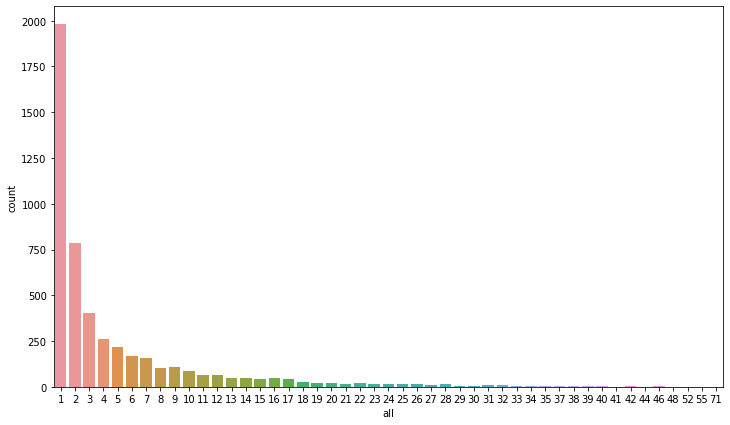

In [11]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
sns.countplot(x='all',data=objects_df)
plt.show()

In [12]:
object_dict = {'General trash':0, 'Paper':0, 'Paper pack':0, 'Metal':0, 'Glass':0, 'Plastic':0, 'Styrofoam':0, 'Plastic bag':0, 'Battery':0, 'Clothing':0}
for image_object in train_json['annotations']:
    object_dict[class_names[image_object['category_id']]] += 1
print(object_dict)

{'General trash': 3966, 'Paper': 6352, 'Paper pack': 897, 'Metal': 936, 'Glass': 982, 'Plastic': 2943, 'Styrofoam': 1263, 'Plastic bag': 5178, 'Battery': 159, 'Clothing': 468}


In [13]:
color_dict = {'0':(240/255,240/255,240/255),'1':(255/255,0/255,0/255),'2':(255/255,120/255,0/255),'3':(255/255,255/255,0/255),'4':(0/255,255/255,0/255),
'5':(0/255,0/255,255/255),'6':(120/255,120/255,120/255),'7':(50/255,50/255,120/255),'8':(50/255,120/255,120/255),'9':(100/255,50/255,50/255)}
color_list = [color for color in color_dict.values()]
color_list

[(0.9411764705882353, 0.9411764705882353, 0.9411764705882353),
 (1.0, 0.0, 0.0),
 (1.0, 0.47058823529411764, 0.0),
 (1.0, 1.0, 0.0),
 (0.0, 1.0, 0.0),
 (0.0, 0.0, 1.0),
 (0.47058823529411764, 0.47058823529411764, 0.47058823529411764),
 (0.19607843137254902, 0.19607843137254902, 0.47058823529411764),
 (0.19607843137254902, 0.47058823529411764, 0.47058823529411764),
 (0.39215686274509803, 0.19607843137254902, 0.19607843137254902)]

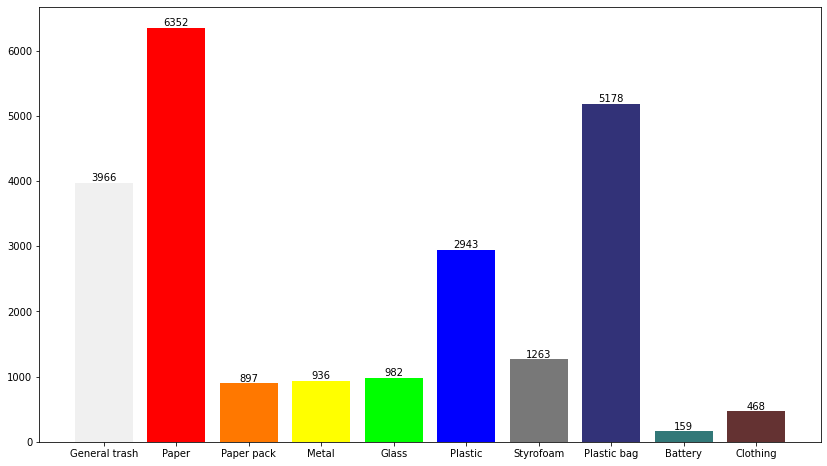

In [14]:
values = [i for i in object_dict.values()]
plt.figure(figsize=(14,8))
plt.bar(class_names, values,color=color_list)

for index, value in enumerate(values):
    plt.text(index, value, value,
            horizontalalignment='center',
            verticalalignment='bottom')

plt.show()

512*512 score(%) : 90.69305219495334 
256*256 score(%) : 61.15191842378154 
128*128 score(%) : 33.14465952298652


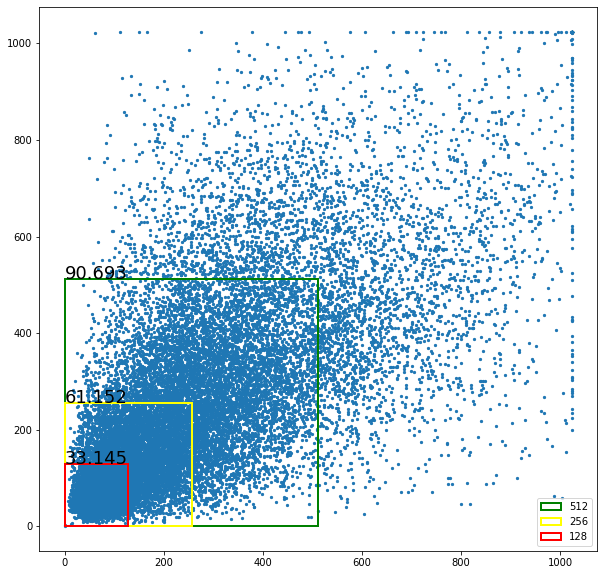

In [15]:
w_list=[]
h_list=[]
count128 = 0
count256 = 0
count512 = 0
for i in range(len(train_json['annotations'])):
    w = train_json['annotations'][i]['bbox'][2]
    h = train_json['annotations'][i]['bbox'][3]
    w_list.append(w)
    h_list.append(h)
    if w*h<128*128:
        count128+=1
    if w*h<256*256:
        count256+=1
    if w*h<512*512:
        count512+=1
score128 = count128/len(train_json['annotations'])
score256 = count256/len(train_json['annotations'])
score512 = count512/len(train_json['annotations'])

print(f"512*512 score(%) : {score512*100} \n256*256 score(%) : {score256*100} \n128*128 score(%) : {score128*100}")
fig,ax=plt.subplots(1,1,figsize=(10,10))
plt.scatter(w_list,h_list,s=5)
box128 = patches.Rectangle((0, 0),128,128,linewidth=2,edgecolor = 'red',fill=False,label='128')
box256 = patches.Rectangle((0, 0),256,256,linewidth=2,edgecolor = 'yellow',fill=False,label='256')
box512 = patches.Rectangle((0, 0),512,512,linewidth=2,edgecolor = 'green',fill=False,label='512')
ax.add_patch(box512)
ax.add_patch(box256)
ax.add_patch(box128)
ax.text(0,128,f'{score128*100:.3f}',size=18)
ax.text(0,256,f'{score256*100:.3f}',size=18)
ax.text(0,512,f'{score512*100:.3f}',size=18)
plt.legend()
plt.show()

In [16]:
objects_df.keys()

Index(['id', 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass',
       'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing', 'all'],
      dtype='object')

objects in 0 image: 4
[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
objects in 4 image: 32
[4, 8, 0, 0, 4, 4, 8, 0, 8, 0, 0, 32]
objects in 28 image: 8
[28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8]
objects in 32 image: 28
[32, 4, 0, 0, 0, 0, 0, 4, 20, 0, 0, 28]
objects in 40 image: 4
[40, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
objects in 44 image: 4
[44, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
objects in 56 image: 20
[56, 0, 0, 0, 4, 0, 0, 0, 4, 0, 12, 20]
objects in 68 image: 4
[68, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
objects in 92 image: 4
[92, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
objects in 96 image: 4
[96, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
objects in 100 image: 4
[100, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
objects in 104 image: 8
[104, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8]
objects in 108 image: 12
[108, 8, 0, 0, 0, 0, 4, 0, 0, 0, 0, 12]
objects in 112 image: 16
[112, 8, 0, 4, 0, 0, 4, 0, 0, 0, 0, 16]
objects in 116 image: 20
[116, 12, 0, 0, 0, 8, 0, 0, 0, 0, 0, 20]
objects in 120 image: 4
[120, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
o

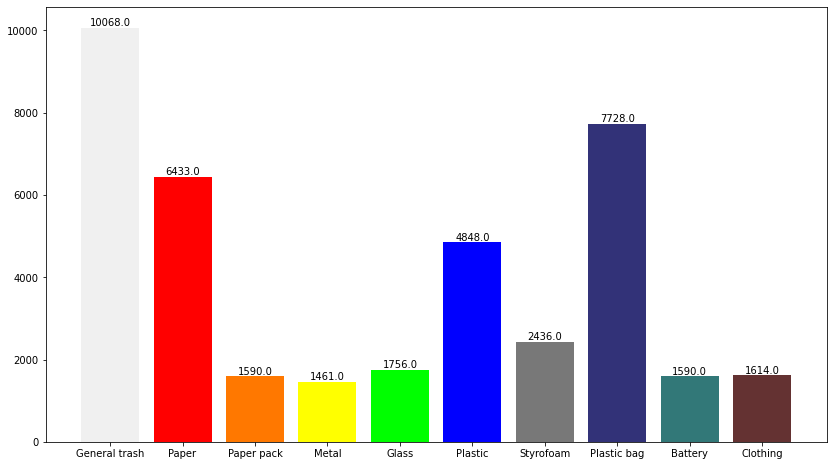

In [22]:
check_df = objects_df.copy()
check_list = list(np.zeros(10))
n=0
for index, data in check_df.iterrows():
    if data['Battery']>0:
        data *=10
        check_list = [i+j for i,j in zip(check_list,list(data)[1:-1])]
        n+=10
        continue
    if (data['Clothing']>0 or data['General trash']>0 ) and data['Paper']==0: 
        # or data['Paper pack']>0 or data['Metal']>0 or data['Glass']>0 or data['Styrofoam']>0:
        data *=4
        print(f"objects in {data['id']} image: {data['all']}")
        print(list(data))
        n+=3
    n+=1
    check_list = [i+j for i,j in zip(check_list,list(data)[1:-1])]
print(n)
plt.figure(figsize=(14,8))
plt.bar(class_names, check_list,color=color_list)

for index, value in enumerate(check_list):
    plt.text(index, value, value,
            horizontalalignment='center',
            verticalalignment='bottom')

plt.show()